In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import functools
import torch
import torch.nn as nn
import torch.functional as F

In [2]:
import pytorchode

In [3]:
if torch.cuda.is_available():
    device = torch.cuda.device(0)

In [4]:
device

In [5]:
m = nn.Sequential(
    nn.Linear(10,20),
    nn.ReLU(),
    nn.Linear(20,15))

In [5]:
x = torch.Tensor(10)

In [6]:
x.cuda()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

In [7]:
def debug(func):
    '''
    Prints inputs and outputs of decorated function
    '''
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print(f"*args: {[a for a in args]}")
        kwarg_str = ["{k}: {v}" for k, v in kwargs.items()]
        print(f"**kwargs: {[a for a in kwarg_str]}")
        value = func(*args, **kwargs)
        print(f"Returned value: {value}")
        return value
    return wrapper

In [8]:
# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k*y
    return dydt

In [9]:
def rk4 ( t0, u0, dt, f ):   
    f1 = f(t0, u0)
    f2 = f(t0 + dt / 2.0, u0 + dt * f1 / 2.0 )
    f3 = f(t0 + dt / 2.0, u0 + dt * f2 / 2.0 )
    f4 = f(t0 + dt, u0 + dt * f3 )
    print(f1,f2,f3,f4)
#
#  Combine them to estimate the solution U1 at time T1 = T0 + DT.
#
    u1 = u0 + dt * ( f1 + 2.0 * f2 + 2.0 * f3 + f4 ) / 6.0

    return u1

In [10]:
def euler(t0, x0, dt, f):
    dx = f(x0, dt)
    x0 += dt * dx
    return x0

In [30]:
x = torch.Tensor(10)

In [44]:
fuk = []
x0 = 5*torch.rand(1)
dt = 0.1
t0 = 0
# integrate for 10s
for i in range(200):
    dx = euler(0, x0, dt, model)

    x0.copy_(dx)
    #print(dx)
    print(dx)
    fuk.append(dx)
    traj.append(dx.numpy())
    t0 += dt
print(traj)

tensor([3.8972])
tensor([3.7803])
tensor([3.6668])
tensor([3.5568])
tensor([3.4501])
tensor([3.3466])
tensor([3.2462])
tensor([3.1488])
tensor([3.0544])
tensor([2.9627])
tensor([2.8739])
tensor([2.7876])
tensor([2.7040])
tensor([2.6229])
tensor([2.5442])
tensor([2.4679])
tensor([2.3938])
tensor([2.3220])
tensor([2.2524])
tensor([2.1848])
tensor([2.1193])
tensor([2.0557])
tensor([1.9940])
tensor([1.9342])
tensor([1.8762])
tensor([1.8199])
tensor([1.7653])
tensor([1.7123])
tensor([1.6610])
tensor([1.6111])
tensor([1.5628])
tensor([1.5159])
tensor([1.4704])
tensor([1.4263])
tensor([1.3835])
tensor([1.3420])
tensor([1.3018])
tensor([1.2627])
tensor([1.2248])
tensor([1.1881])
tensor([1.1524])
tensor([1.1179])
tensor([1.0843])
tensor([1.0518])
tensor([1.0202])
tensor([0.9896])
tensor([0.9600])
tensor([0.9312])
tensor([0.9032])
tensor([0.8761])
tensor([0.8498])
tensor([0.8243])
tensor([0.7996])
tensor([0.7756])
tensor([0.7524])
tensor([0.7298])
tensor([0.7079])
tensor([0.6867])
tensor([0.6661

In [43]:
fuk

[tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0079]),
 tensor([0.0

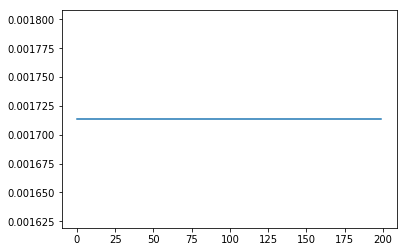

In [40]:
plt.plot(traj)
